### 2. Imaging the Chandra Data in a Variety of Ways

Using ObsIDS `18689` and `17218`, this notebook creates:
1. `Quantify size of wings in surface brightness image`
2. `If space between wings is a cavity, how much heat injected?`
3. 



In [1]:
path_to_beads = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [2]:
#system
from __future__ import division
import sys

#numpy
import numpy as np

import h5py

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set1_4 as brewermap
%matplotlib inline


#astropy
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Angle

#pandas
import pandas as pd

#scipy
import scipy

#seaborn
import seaborn as sns 

import importlib


In [3]:
#import my own functions: you can see them in full in the utils folder
util_path = path_to_beads + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as sf

In [4]:
#uncomment if need to reload module
importlib.reload(pf)

<module 'plotting_functions' from '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Notebooks/Beads20/utils/plotting_functions.py'>

In [5]:
#paths
fig_path = path_to_beads + 'Figures/paper/'
chandra_data_directory = '/Users/osaseomoruyi/chandra/alternate_tmap/alternate_spectral_maps_working_dir/merged/'
other_chandra_path = '/Users/osaseomoruyi/chandra/merged/'

In [6]:
#About my galaxy cluster
name = 'SDSS J1531+3414'
ra = 232.7936938
dec = 34.2404172
radius = Angle(2.5, u.arcsec)

zh  = 0.335 #z selected from Hennawi (2008)
cz = zh * const.c.to('km/s') # The stellar systemic velocity that we'll subtract off of our velocity maps. I always use Astropy Units - read up on them if you're not famililar!

cosmo = LambdaCDM(H0=71, Om0=0.27, Ode0=0.73)
da = cosmo.angular_diameter_distance(zh)
dl = cosmo.luminosity_distance(zh)

angular_diameter_distance = cosmo.angular_diameter_distance(z=zh) # in Mpc
kpc_per_arcsec = cosmo.kpc_proper_per_arcmin(z=zh).to(u.kpc / u.arcsec)

In [7]:
#plot style
pf.styleplots()

### Load Data

In [8]:
chandra_smoothed_file = ''.join((chandra_data_directory, 'broad_flux_g1.img'))
chandra_soft_file = ''.join((chandra_data_directory, 'soft_flux.img'))
chandra_medium_file = ''.join((chandra_data_directory, 'medium_flux.img'))
chandra_hard_file = ''.join((chandra_data_directory, 'hard_flux.img'))

chandra_wavelet_file = ''.join((path_to_beads, 'Analysis/chandraBeads/wavelet_fit/beads_lynx_img.fits'))
chandra_raw_file = ''.join((path_to_beads, 'Analysis/chandraBeads/merged/beads_xray_bin2_broad_flux.img'))

chandra_unsharp_mask_file = ''.join((other_chandra_path, 'bin2_broad_flux_unsharpmask.img'))
chandra_g1_file = ''.join((other_chandra_path, 'bin2_broad_flux_g098.img'))
chandra_g10_file = ''.join((other_chandra_path, 'bin2_broad_flux_g98.img'))

In [9]:
csmooth_hdu, csmooth_hdr, csmooth_wcs = pf.open_fits(chandra_smoothed_file)
craw_hdu, craw_hdr, craw_wcs = pf.open_fits(chandra_raw_file)

csoft_hdu, csoft_hdr, csoft_wcs = pf.open_fits(chandra_soft_file)
cmed_hdu, cmed_hdr, cmed_wcs = pf.open_fits(chandra_medium_file)
chrd_hdu, chrd_hdr, chrd_wcs = pf.open_fits(chandra_hard_file)

cwav_hdu, cwav_hdr, cwav_wcs = pf.open_fits(chandra_wavelet_file)

cun_msk_hdu, cun_msk_hdr, cun_msk_wcs = pf.open_fits(chandra_unsharp_mask_file)
cg1_hdu, cg1_hdr, cg1_wcs = pf.open_fits(chandra_g1_file )
cg10_hdu, cg10_hdr, cg10_wcs = pf.open_fits(chandra_g10_file )

In [10]:
#plot HST on top
hst_hdr, hst_wcs, hst_hdu = sf.load_HST_data(path_to_beads)
ysc_coords = sf.ysc_load(path_to_beads)
hst_cont_color, ysc_color = 'k', 'cyan'

### 6. Quantify size of wings in surface brightness image

In [ ]:
#ds9 
# left wing is 6.721"
# right wing is 4.546" 

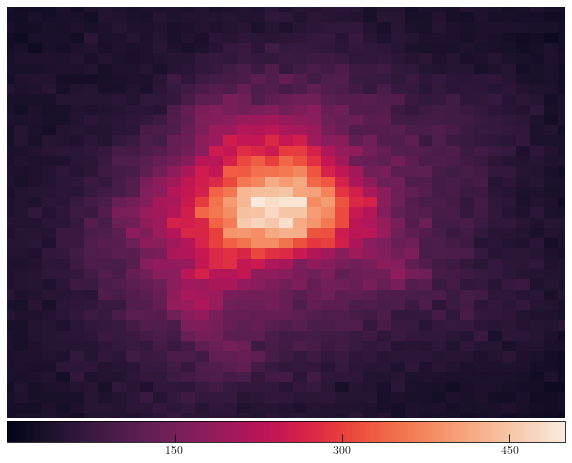

In [42]:
#draw
fig = plt.figure(figsize=(10, 8))
gs1 = GridSpec(1, 1)

cmap=sns.color_palette("rocket", as_cmap=True)
chandra_zoom = [232.7940588,34.2402090, 10 * u.arcsec]

clims=[[0, 500]]
data_maps = [cwav_hdu.data]
axs = []

for id_subplot in range(1):
    clim = clims[id_subplot]
    data = data_maps[id_subplot]

    ax = fig.add_subplot(gs1[id_subplot], projection=WCS(cwav_hdr))

    ax, cb = pf.ax_fits_map(hdu=None, data=data, hdr=cwav_hdr,
                        vmin=clim[0], vmax=clim[1], cmap=cmap, 
                        coords=chandra_zoom, ax=ax, contour=False, 
                        clip=None, lw=5, location='bottom')

    #HST Contours: uncomment below lines if not in rush
    # pf.overlay(ax, hst_hdu, 1, vmin=0., vmax=0.5, nlev=10, contours=True, 
    #             cont_color='cyan', lw=1)
    ax.axis('off')

In [44]:
right_wing_kpc = 4.546 * u.arcsec * kpc_per_arcsec
left_wing_kpc = 6.721 * u.arcsec * kpc_per_arcsec

In [45]:
print("Right wing length: {:.2f}".format(right_wing_kpc))
print("Left wing length: {:.2f}".format(left_wing_kpc))

Right wing length: 21.67 kpc
Left wing length: 32.04 kpc


### 7. If space ebtween wings is a cavity, was the heat released enoug to mitgate ICM cooling?

In [9]:
specfit_savepath = path_to_beads + 'Analysis/chandraBeads/ciao_spectra_results/'
cel_flux = np.load(specfit_savepath + 'cf_60.npy')
cel_flux_err = np.load(specfit_savepath + 'cf_err_60.npy')

flux = np.load(specfit_savepath + 'flux_60.npy')
flux_err = np.load(specfit_savepath + 'flux_err_60.npy')

In [10]:
#KT and norm
kTs = np.load(specfit_savepath + 'kTs_60.npy') * u.keV
kT_errs = np.load(specfit_savepath + 'kT_err_60.npy') * u.keV
norms = np.load(specfit_savepath + 'norms_60.npy')
norm_errs = np.load(specfit_savepath + 'norm_errs_60.npy')


radius_df = pd.DataFrame(np.load(specfit_savepath + 'radius_60.npy'), columns=['radius', 
                            'radius_err', 'r_inner', 'r_outer'])

r_inner_in_kpc = radius_df['r_inner'].to_numpy() * u.kpc 
r_outer_in_kpc = radius_df['r_outer'].to_numpy() * u.kpc 
radius_to_plot = radius_df['radius'].to_numpy() * u.kpc 
radius_err_to_plot = radius_df['radius_err'].to_numpy() * u.kpc 

volume = (4/3) * scipy.pi * (r_outer_in_kpc**3 - r_inner_in_kpc**3)

#electron density
electron_density = np.sqrt((norms * u.cm**-5 * 4 * np.pi * 
                            np.power(angular_diameter_distance.to(u.cm) * (1 + zh), 2)) 
                            / (1.e-14 * 0.82 * volume.to(u.cm**3))) 
electron_density_err = electron_density / (2*norms) * norm_errs

#pressure
pressure = (2 * electron_density * kTs).to(u.dyne/u.cm**2)
pressure_err  = pressure * sf.dm_error_prop([electron_density, kTs], [electron_density_err, kT_errs])

#entropy
entropy  = kTs * np.power(electron_density, -2.0/3.0)
entropy_err = entropy * sf.dm_error_prop([kTs.value, np.power(electron_density, -2/3).value], 
                [kT_errs.value, sf.exp_error_prop(electron_density, electron_density_err, -2/3) ])

#cooling time
cooling_time = sf.tcool(electron_density, kTs)
cool_func_err = sf.dm_error_prop([kTs**-1.7, kTs**0.5], [sf.exp_error_prop(kTs, kT_errs, -1.7), 
                    sf.exp_error_prop(kTs, kT_errs, 0.5)]) * sf.coolingFunction(kTs)

cooling_time_err = cooling_time * sf.dm_error_prop([pressure.value, np.power(electron_density, 2).value, sf.coolingFunction(kTs).value],
                    [pressure_err.value, sf.exp_error_prop(electron_density, electron_density_err, 2).value, cool_func_err])

In [11]:
luminosity  = flux * u.erg / u.s / u.cm**2  * 4.0 * np.pi * np.power(cosmo.luminosity_distance(zh), 2) # in erg/s
luminosity_err  = luminosity * scipy.log(10) * flux_err

scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


In [12]:
luminosity.to(u.erg/u.s)[3]

<Quantity 4.98461509e+43 erg / s>

In [13]:
cooling_time.to(u.Gyr)[3]

<Quantity 2.40977127 Gyr>

In [19]:
def cavity_power(R, radius_cav, pressure_cav, sigma, C=0.75, gamma=5./3., kT=2.3, mu=0.62):
    """
    Calculate the cavity power of an ellipsoidal cavity in the ICM.

    Parameters
    ----------
    R : float
        Projected distance from the center of the cavity to the BCG center [kpc].
    radius_cav : float
        Projected radius of the cavity [kpc].
    pressure_cav : float
        pressure of outer edges of bubbble
    sigma : float
        Stellar velocity dispersion of the BCG [km/s].
    C : float, optional
        Drag coefficient, default to 0.75.

    Returns
    -------
    P_cav : float
        Cavity power [erg/s].
    """
    g = 2 * sigma**2 / R  # Gravitational acceleration [cm/s^2]
    S =   4 * np.pi * radius_cav**2 #cross sectional area of cavity
    V = 4 * np.pi * radius_cav**3 #volume cavity
 
    v_sound = np.sqrt(2*g*V/(C*S)) #np.sqrt(gamma * (kT*u.keV)/(mu * const.m_p))
    print(v_sound.to(u.km/u.s))
    t_cav = R /v_sound   # Cavity age [s]
    #print(t_cav.to(u.year))
    E_cav = 4 * pressure_cav * V  # Cavity energy [erg]
    P_cav = E_cav / t_cav  # Cavity power [erg/s]
    
    return P_cav.to(u.erg/u.s)


In [20]:
radius_cavity = 2.868 * u.arcsec * kpc_per_arcsec
distance_to_cavity = 4.338 * u.arcsec * kpc_per_arcsec #20.6 kpc
pressure_cavity = pressure[2] #annulus that contains distance to cavity
pressure_cavity_err = pressure_err[2]
sigma = 998 * u.km/u.s #bayliss 2011

power_cavity = cavity_power(distance_to_cavity, radius_cavity, pressure_cavity, sigma)
power_cavity_err = cavity_power(distance_to_cavity, radius_cavity, pressure_cavity_err, sigma)
print(power_cavity, power_cavity_err)

1874.0220860920776 km / s
1874.0220860920776 km / s
3.488197335957573e+45 erg / s 5.01605306801597e+43 erg / s


In [46]:
total_cav_energy = power_cavity * cosmo.age(zh)

In [48]:
total_cav_energy.cgs

<Quantity 1.096863e+63 erg>

In [43]:
pressure_cavity

<Quantity 3.1470117e-10 dyn / cm2>

In [75]:
energy_cavity = 4 * pressure_cavity * volume_cavity

In [87]:
vstar = 350 * u.km/u.s
grav_accel = 2 * np.power(vstar, 2)/R_cavity
v_terminal = np.sqrt((2 * grav_accel * volume_cavity)/(0.75 * area_cavity))

In [88]:
t_cavity = R_cavity/v_terminal
e_cavity = 4 * pressure_cavity * volume_cavity

In [90]:
t_cavity.to(u.year)/1e7

<Quantity 5.07834999 yr>

In [91]:
energy_cavity.cgs

<Quantity 3.19013791e+59 erg>

In [92]:
power_cavity = energy_cavity/t_cavity

In [93]:
power_cavity.cgs

<Quantity 1.99059479e+44 erg / s>

In [94]:
pressure_cavity

<Quantity 3.1470117e-10 dyn / cm2>

In [95]:
15/(2 + np.sqrt(2))

4.393398282201788

In [21]:
m500 = 1.9e14 * u.solMass
r500 = 779 * u.kpc
g = ((m500 * const.G)/r500**2)

In [22]:
t_cavity = 1 * np.sqrt(np.sqrt(a_cavity * b_cavity)/g)

In [23]:
power_cavity = enthalpy_cavity/t_cavity

In [24]:
power_cavity.cgs

<Quantity 1.65513128e+37 erg / s>

8. Counts per annulus

dmlist "v17218_flux_rprofile.fits[HISTOGRAM][cols counts,net_counts]" data